# Intro to Deep Learning with Keras
### Starter Code
* **IBM Code London Meetup:** https://www.meetup.com/IBM-Code-London/events/255417147/
* **Date:** Wed 31st October 2018
* **Instructor:** John Sandall
* **Contact:** john@coefficient.ai / @john_sandall

---

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn import datasets, ensemble, linear_model, model_selection, neighbors, metrics, preprocessing, neural_network
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
np.random.seed(0)

## Lab: Multi-Layer Perceptron
### The MNIST Dataset
![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

From [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database):
> The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

From [OpenML](https://www.openml.org/d/554) (the source for this specific data):
> The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples 

In [2]:
from keras import datasets

Using TensorFlow backend.


In [3]:
# Download MNIST via Keras (requires internet connection)
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


In [4]:
# What does this data look like?
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
print("One sample from X_train:", X_train[0].shape)

X_train: (60000, 28, 28)
X_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)
One sample from X_train: (28, 28)


Class = 0
Class = 4


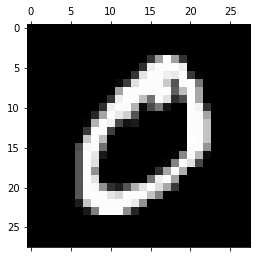

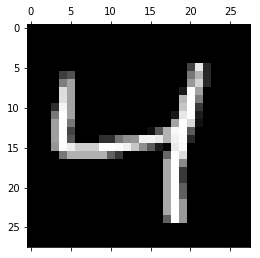

In [5]:
# Visualise some samples
print("Class =", y_train[1])
plt.matshow(X_train[1], cmap=plt.cm.gray)

print("Class =", y_train[2])
plt.matshow(X_train[2], cmap=plt.cm.gray)

In [6]:
# Let's look at a single sample
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
# This needs to be flattened before we can feed it into sklearn's MLPClassifier
X_train_flat = np.array([elt.reshape(784,) for elt in X_train])
X_test_flat = np.array([elt.reshape(784,) for elt in X_test])
print(X_train[0].shape)
print(X_train_flat[0].shape)

(28, 28)
(784,)


### Train a multi-layer perceptron in scikit-learn

In [8]:
# Fit a basic model
mlp = neural_network.MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp.fit(X_train_flat, y_train)
print("Training set score: %f" % mlp.score(X_train_flat, y_train))
print("Test set score: %f" % mlp.score(X_test_flat, y_test))

Iteration 1, loss = 88770.19492622
Iteration 2, loss = 94144.72785948
Iteration 3, loss = 94116.48942606
Iteration 4, loss = 94088.25915097
Iteration 5, loss = 94060.03773325
Iteration 6, loss = 94031.82434269
Iteration 7, loss = 94003.61939577
Iteration 8, loss = 93975.42334401
Iteration 9, loss = 93947.23547037
Iteration 10, loss = 93919.05614157
Training set score: 0.112367
Test set score: 0.113500


In [9]:
# What do the coefficients look like?
print("Hidden layer:", mlp.coefs_[0].shape)
print("Output layer:", mlp.coefs_[1].shape)

Hidden layer: (784, 50)
Output layer: (50, 10)


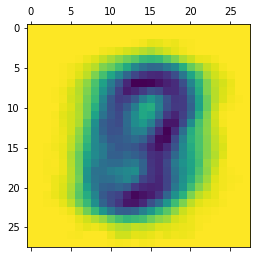

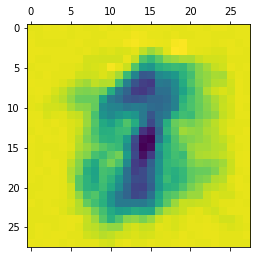

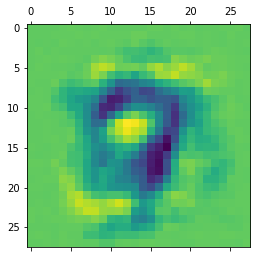

In [10]:
# There are 50 of these "weight matrices", each specialising in enhancing signal from certain shapes/areas.
# Here are first few.
plt.matshow(mlp.coefs_[0][:,1].reshape(28,28))
plt.matshow(mlp.coefs_[0][:,2].reshape(28,28))
plt.matshow(mlp.coefs_[0][:,3].reshape(28,28))

In [11]:
# Fit a deep neural network with two hidden layers (both with 100 neurons)
# WARNING: Takes a while! scikit-learn really isn't designed for this kind of work!
mlp = neural_network.MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp.fit(X_train_flat, y_train)

Iteration 1, loss = 2.78019142
Iteration 2, loss = 2.05903847
Iteration 3, loss = 1.83975622
Iteration 4, loss = 1.63369531
Iteration 5, loss = 1.43538198
Iteration 6, loss = 1.37235283
Iteration 7, loss = 1.33507616
Iteration 8, loss = 1.31028038
Iteration 9, loss = 1.28911785
Iteration 10, loss = 1.25762240
Iteration 11, loss = 1.20838550
Iteration 12, loss = 1.14104039
Iteration 13, loss = 1.07083018
Iteration 14, loss = 0.99207111
Iteration 15, loss = 0.93662612
Iteration 16, loss = 0.90248672
Iteration 17, loss = 0.87662723
Iteration 18, loss = 0.85567538
Iteration 19, loss = 0.84098512
Iteration 20, loss = 0.82903642
Iteration 21, loss = 0.81932746
Iteration 22, loss = 0.80374098
Iteration 23, loss = 0.78816127
Iteration 24, loss = 0.77450312
Iteration 25, loss = 0.76497822
Iteration 26, loss = 0.75699685
Iteration 27, loss = 0.75168843
Iteration 28, loss = 0.74546723
Iteration 29, loss = 0.72781397
Iteration 30, loss = 0.70740627
Iteration 31, loss = 0.69675634
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

In [12]:
print("Training set score: %f" % mlp.score(X_train_flat, y_train))
print("Test set score: %f" % mlp.score(X_test_flat, y_test))

Training set score: 0.884800
Test set score: 0.880600


Hidden layer #1: (784, 100)
Hidden layer #2: (100, 100)
Output layer: (100, 10)


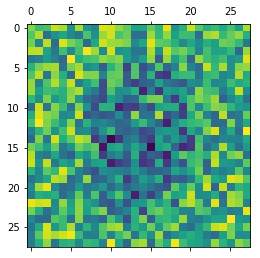

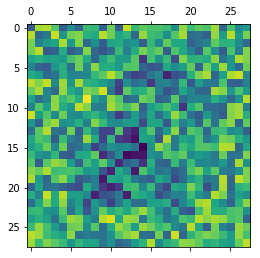

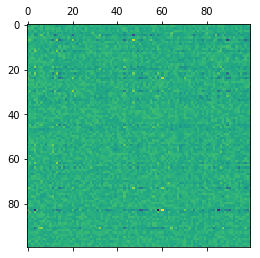

In [13]:
# What do the coefficients look like?
print("Hidden layer #1:", mlp.coefs_[0].shape)
print("Hidden layer #2:", mlp.coefs_[1].shape)
print("Output layer:", mlp.coefs_[2].shape)

# Look at some of the weight matrices in the first and second layer.
plt.matshow(mlp.coefs_[0][:,1].reshape(28,28))
plt.matshow(mlp.coefs_[0][:,2].reshape(28,28))
plt.matshow(mlp.coefs_[1])

Predicted class: 7
Predicted probabilities: [0.0, 0.0, 0.0001, 0.0012, 0.0, 0.0, 0.0, 0.9963, 0.0, 0.0024]


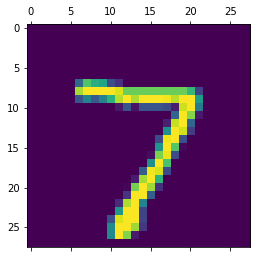

In [14]:
# Visualise and predict for one of the test set classes
print("Predicted class:", mlp.predict(X_test_flat[:1])[0])
print("Predicted probabilities:", [round(x, 4) for x in mlp.predict_proba(X_test_flat[:1])[0]])
plt.matshow(X_test[0])

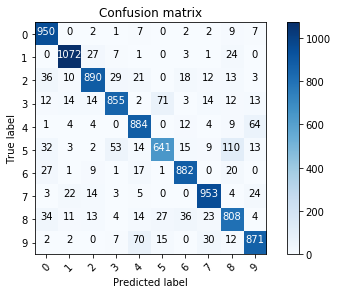

In [15]:
# Visualise confusion matrix
# Adapted from sklearn example code:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools


def plot_confusion_matrix(cm, classes):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = metrics.confusion_matrix(y_test, mlp.predict(X_test_flat))
plot_confusion_matrix(cm, classes=range(10))

# 5 is often confused with 8, as is 4/9, and 3/5.

---

## Lab: Build a MLP in Keras

In [16]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint, LearningRateScheduler
from keras.models import Sequential, Model, load_model, model_from_json, model_from_yaml, save_model
from keras.layers import Input, Dense, Activation, BatchNormalization
from keras import initializers, optimizers, utils

In [17]:
# Check if Keras is using GPU version of TensorFlow
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18196105059485075442
]


> #### Exercise: Create a `Sequential()` MLP with:
> - One hidden layer containing 50-neurons that accepts the flattened MNIST data as input (i.e. vector of length 784) + ReLU activation.
> - One 10-class output layer with Softmax activation.
> - Assign this to a variable called `model`.

In [18]:
# Define
model = Sequential(...)

TypeError: 'ellipsis' object is not iterable

> #### Exercise: Compile `model` using `sgd` optimizer, `categorical_crossentropy` loss, and `accuracy` metric.
> Cross-entropy aims to penalise models that estimate a low probability for the target class. For more intuition on how cross-entropy works, see https://www.quora.com/Whats-an-intuitive-way-to-think-of-cross-entropy

In [ ]:
# Compile
model.compile(...)

> #### Exercise: Fit the compiled model to `X_train_flat` and `y_train` using 1 epoch and a `batch_size` of 32. How does the accuracy result compare to the 50-neuron MLP from sklearn?

In [ ]:
# If you don't have a GPU you may wish to reduce the dataset for expedience. Otherwise leave this commented out.
# X_train = X_train[:10000]
# X_train_flat = X_train_flat[:10000]
# y_train = y_train[:10000]

# Convert labels to categorical one-hot encoding
y_train_encoded = utils.to_categorical(y_train, num_classes=10)
y_test_encoded = utils.to_categorical(y_test, num_classes=10)

In [ ]:
# Fit (this may take a while!)
model.fit(...)

In [ ]:
score = model.evaluate(...)
score

> #### Exercise: Repeat for a DNN with two hidden layers with 100 neurons in each layer. How does this compare (in terms of both speed and accuracy) with the MLP DNN?
> 
> **Tip!** This model is a lot more complex, you may want to run this for 50+ epochs.

In [ ]:
# ...


---

## Re-using Keras "Application" Models

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
model = ResNet50(weights='imagenet')

In [ ]:
# Feel free to replace this with any image!
import urllib.request

img_path = 'elephant.jpg'
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/African_Bush_Elephant.jpg/220px-African_Bush_Elephant.jpg"
urllib.request.urlretrieve(image_url, img_path)

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# Decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

---

### Next steps
* **[Intro to Python for Data Science](https://www.eventbrite.co.uk/e/intro-to-python-for-data-science-registration-51843211441)** Two workshops on 5th November (Part I) and 7th November (Part II). Use `LEARN2CODE29` for 10% off (gives you both workshops for just £90).
* **[Future workshops](https://mailchi.mp/a06466074a39/coefficient-training):** [Sign up here](https://mailchi.mp/a06466074a39/coefficient-training)  to hear about future workshops.
* **[Learn Python The Hard Way](https://learnpythonthehardway.org/book/):** Free online resource to learn Python to a somewhat advanced level.
* **[Learn pandas & sklearn on Kaggle](https://www.kaggle.com/learn/overview):** Jupyter Notebook based training exercises and examples.
* **Contact:** john@coefficient.ai / @john_sandall

---